In [1]:
import pandas as pd

# Load dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Show the first few rows
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Describe the data
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

In [4]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
X = df.drop('quality', axis=1)  # features
y = df['quality']               # target


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.39002514396395493
R² Score: 0.4031803412796219


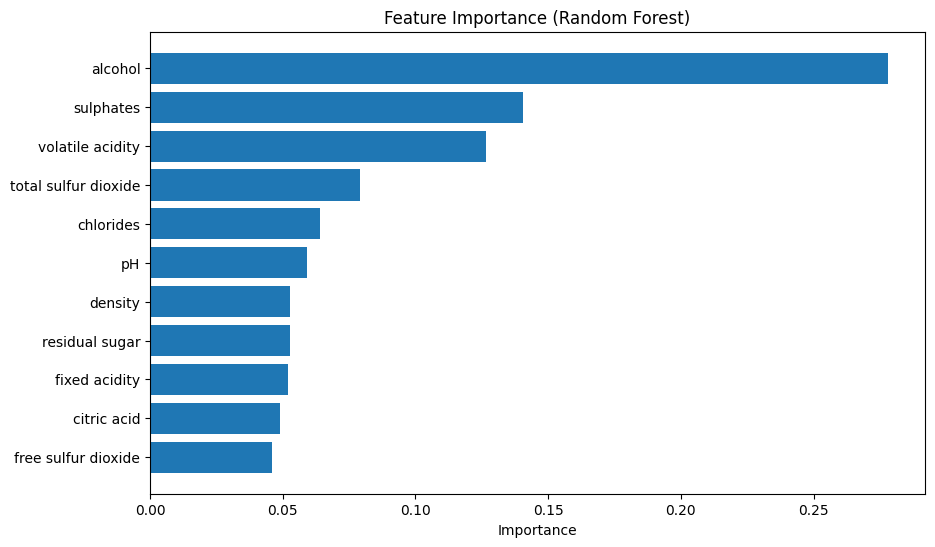

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Features und Ziel definieren
X = df.drop('quality', axis=1)
y = df['quality']

# Modell trainieren
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature Importances holen
importances = model.feature_importances_
feature_names = X.columns

# In DataFrame umwandeln
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


In [10]:
# Quadratischen Term für Alkohol hinzufügen
df['alcohol_squared'] = df['alcohol'] ** 2

# Features und Zielvariablen definieren
X = df.drop('quality', axis=1)
y = df['quality']

# Splitten der Daten in Trainings- und Testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell definieren (z.B. lineares Modell oder RandomForest)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Modell trainieren
model.fit(X_train, y_train)

# Vorhersagen und Auswertung
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# MSE und R² ausgeben
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.39093243226500646
R² Score: 0.40179200131596915


In [12]:
# Create interaction terms
df['alcohol_density_interaction'] = df['alcohol'] * df['density']
df['alcohol_citric_acid_interaction'] = df['alcohol'] * df['citric acid']
df['alcohol_sulphates_interaction'] = df['alcohol'] * df['sulphates']

# Preview the new features
print(df[['alcohol', 'density', 'citric acid', 'sulphates', 
          'alcohol_density_interaction', 'alcohol_citric_acid_interaction', 
          'alcohol_sulphates_interaction']].head())

# Re-run the model with the new features
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (let's use Random Forest for now)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


   alcohol  density  citric acid  sulphates  alcohol_density_interaction  \
0      9.4   0.9978         0.00       0.56                      9.37932   
1      9.8   0.9968         0.00       0.68                      9.76864   
2      9.8   0.9970         0.04       0.65                      9.77060   
3      9.8   0.9980         0.56       0.58                      9.78040   
4      9.4   0.9978         0.00       0.56                      9.37932   

   alcohol_citric_acid_interaction  alcohol_sulphates_interaction  
0                            0.000                          5.264  
1                            0.000                          6.664  
2                            0.392                          6.370  
3                            5.488                          5.684  
4                            0.000                          5.264  
Mean Squared Error: 0.3003075
R² Score: 0.5404670123582241


In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter distribution for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest - MSE: {mse}, R²: {r2}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

Best Hyperparameters: {'n_estimators': np.int64(400), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Optimized Random Forest - MSE: 0.29985986328124997, R²: 0.541151989718914


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor (ensure that you're using the optimized one if needed)
rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

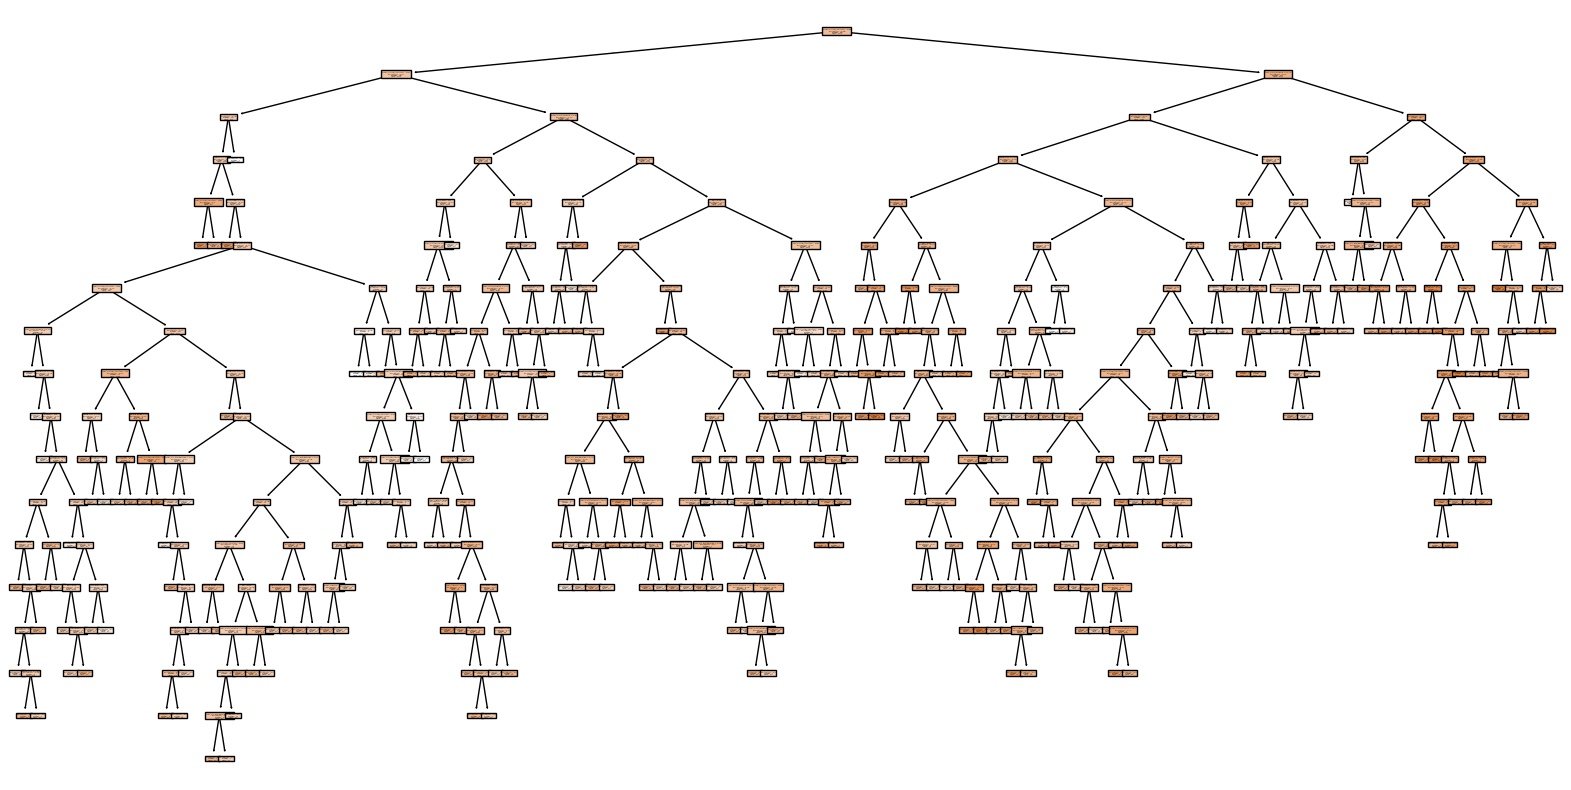

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first tree in the forest
best_tree = rf_random.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=["Quality"])
plt.show()


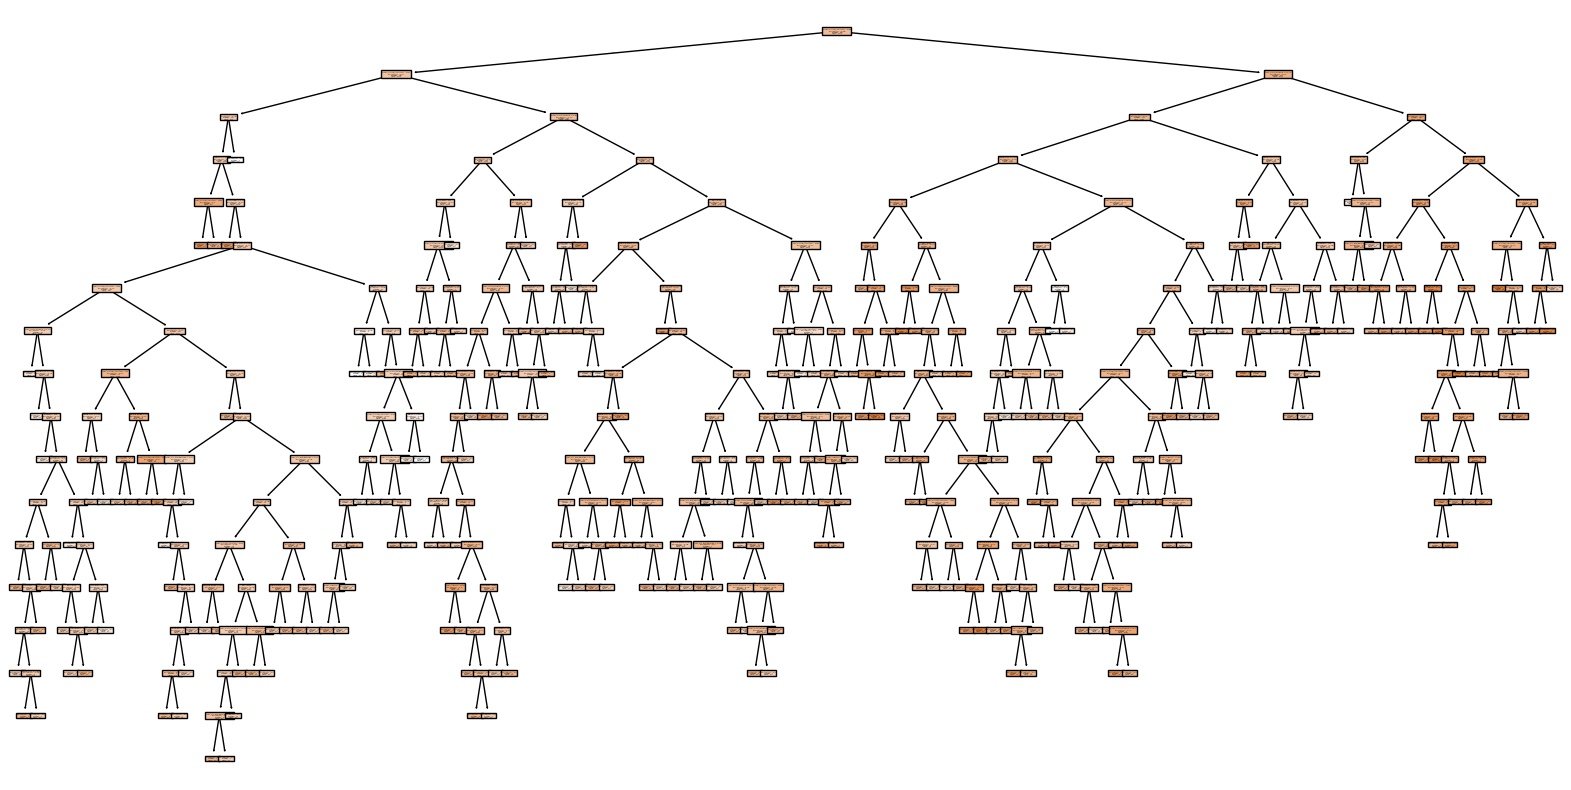

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first tree in the forest
best_tree = rf_random.estimators_[0]

# Plot the tree with higher resolution
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=["Quality"])

# Save the plot with higher DPI for better clarity
plt.savefig('best_tree.png', dpi=300)
plt.show()


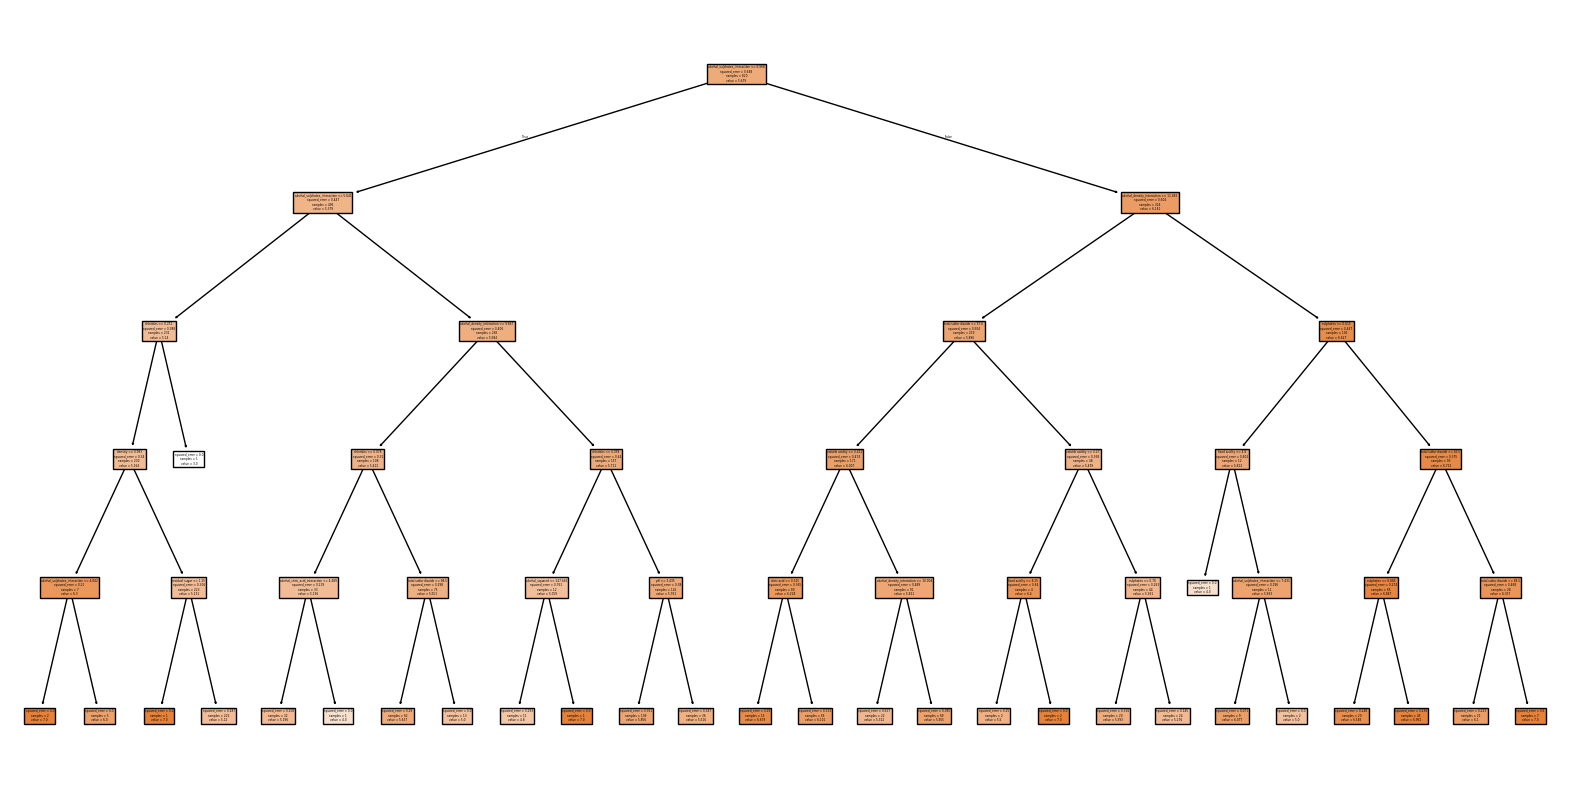

In [19]:
# Create a RandomForestRegressor with a limited max depth
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Plot the tree with limited depth
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=["Quality"])
plt.savefig('limited_depth_tree.png', dpi=300)
plt.show()
